In [56]:
def preprocess(file_name):
    with open(file_name) as f:
        d = json.load(f)
    data = json_normalize(d['summaries'])

    get_names = lambda x: [i['name'] for i in x if i['name'] is not ""] if len(x) else []
    data['architectures'] = data['architectures'].map(get_names)
    data['architectures'] = data['architectures'].apply(sorted)
    data['num_archs'] = data['architectures'].map(len)

    data['architectures'] = data['architectures'].map(lambda x: ", ".join(x))
    data = data.drop(['certification_status', 'id',
                      'filter_type', 'logo_url.large',
                      'logo_url.small', 'popularity',
                      'publisher.id', 'name', 'publisher.name', 'type'], axis=1)
    labels_as_list = lambda x: ", ".join(i['label'] for i in x if i['label'] is not "") if \
        len(x) else None
    data['operating_systems'] = data['operating_systems'].map(labels_as_list)

    # def to_numbers(x):
    #     no_plus = str(x)[:-1] if "+" in str(x) else x
    #     print(no_plus)
    #     print(x)
    #     no_plus = no_plus.strip()
    #     number, suffix = float(no_plus[:-1]), no_plus[-1]
    #
    #     if suffix is "K":
    #         return number * 1000
    #     elif suffix is "M":
    #         return number * 1000000
    #     else:
    #         return number
    # data['pull_count'] = data['pull_count'].map(to_numbers)
    data['pull_count'] = data['pull_count'].map(lambda x: str(x)[:-1] if "+" in str(x) else str(x))
    data['pull_count'] = data['pull_count'].map(
        lambda x: float(x[:-1]) * 1000 if x[-1] is "K" else\
        float(x[:-1]) * 1000000 if x[-1] is "M" else float(x))

    # data['categories_exists'] = data['categories'].map(lambda x: 1 if x else 0)
    data['category_count'] = data['categories'].map(lambda x: len(x) if x else 0)
    data = data.drop(['categories'], axis=1)
    data.set_index('slug')
    return data

In [57]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

In [58]:
DATA_DIR = "../data/recent-data/"
import os
files = sorted(os.listdir(DATA_DIR), reverse=True)

In [62]:

file_1 = os.path.join(DATA_DIR, files[0])
df1 = preprocess(file_1)[['slug', 'pull_count']]

for i in range(len(files) - 1):
    file_2 = os.path.join(DATA_DIR, files[i + 1])
    df2 =  preprocess(file_2)
    df1 = df1.merge(df2[['slug', 'pull_count']], how='outer', on='slug')
#     print(df1.head())
    

In [63]:
df1.head()

,slug,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,...,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y
0,cacciald/mocker-python,623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dronemapper/node-micmac,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN
2,webdollar/node,2700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2700.0,NaN,NaN,NaN,2700.0
3,ctftraining/october_2019_twice_sqli,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,liquidweb/php-fpm_exporter,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#df1['change'] = (df1.iloc[:,1] - df1.iloc[:,-1])/df1.iloc[:,-1]
df1 = df1.fillna(0.0)
df1 = df1.drop(df1[df1.max(axis=1) <= df1.min(axis=1)].index)


,slug,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,...,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y
0,cacciald/mocker-python,623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,dronemapper/node-micmac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0
2,webdollar/node,2700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2700.0,0.0,0.0,0.0,2700.0
3,ctftraining/october_2019_twice_sqli,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,liquidweb/php-fpm_exporter,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,jgoerzen/home-assistant,226.0,222.0,0.0,219.0,218.0,216.0,213.0,211.0,0.0,...,269.0,261.0,254.0,248.0,235.0,234.0,234.0,234.0,234.0,232.0
6,liuchong/rustup,50000.0,0.0,0.0,0.0,0.0,50000.0,50000.0,0.0,0.0,...,0.0,0.0,0.0,50000.0,50000.0,0.0,0.0,0.0,0.0,50000.0
7,gatsbyjs/gatsby-dev-builds,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,...,7100.0,7100.0,0.0,7100.0,7100.0,7100.0,0.0,7100.0,7100.0,7100.0
8,forumi0721alpinex64/alpine-x64-jenkins,1700.0,0.0,0.0,0.0,0.0,0.0,1700.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1700.0,0.0,0.0,0.0,0.0,0.0
9,amcarrasco/foundation_flask,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.0,41.0,0.0,0.0,0.0,0.0


In [87]:
df_final = pd.DataFrame(columns=['name'] + [str(i) for i in range(158)])
csv_file = open("data.csv", "w+")
csv_file.write(", ".join(['name'] + [str(i) for i in range(158)]) + "\n")
for idx,row in df1.iterrows():
    lis = list(row)
    name = lis[0]
    pull_counts = [str(i) for  i in sorted(lis[1:])]
    csv_file.write(", ".join([name] + pull_counts) + "\n")
    
csv_file.close()
#     as_dict = {str(i):i for i in pull_counts}
#     as_dict['name'] = name
#     df_final = df_final.append(as_dict, ignore_index=True)
    #print([name] + pull_counts)

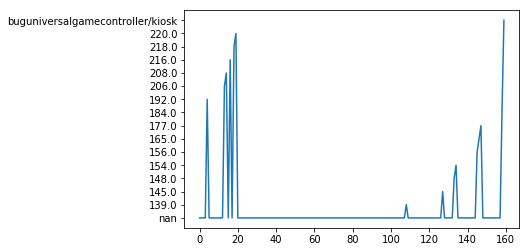

In [42]:
import matplotlib.pyplot as plt
plt.plot(list(df1.iloc[10])[::-1])

In [49]:
df1['change'].value_count

Series([], Name: change, dtype: int64)

In [ ]:
df1